In [111]:
import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import Imputer
data=pd.read_csv('train.csv',encoding='big5')

C:\Users\doggy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [112]:
data.head()

,CUS_ID,GENDER,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,Y1
0,3418,M,低,A1,A1,NaN,NaN,Y,0,N,...,0.000174,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,4302,M,低,A1,A1,NaN,NaN,Y,0,N,...,0.008724,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,5545,M,低,A1,A1,1.0,0.0,Y,1,Y,...,0.005359,A,Y,N,N,N,N,N,N,N
3,7207,M,低,A1,A1,NaN,0.0,Y,0,N,...,0.000000,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,7213,M,低,A1,A1,1.0,0.0,N,0,N,...,0.000603,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


## NULL值

In [113]:
data.isnull().sum()

CUS_ID                 0
GENDER               683
AGE                    0
CHARGE_CITY_CD         0
CONTACT_CITY_CD        0
                   ...  
FINANCETOOLS_D     62641
FINANCETOOLS_E     62641
FINANCETOOLS_F     62641
FINANCETOOLS_G     62641
Y1                     0
Length: 132, dtype: int64

In [114]:
data = data.fillna("NaN")
#data.isnull().sum()

In [115]:
data["GENDER"].describe()

count     100000
unique         3
top            F
freq       52944
Name: GENDER, dtype: object

## Categorical columns

In [5]:
def OHE(df):
    col = ['GENDER','CHARGE_CITY_CD','CONTACT_CITY_CD','MARRIAGE_CD','CUST_9_SEGMENTS_CD']
    print('Categorical columns in dataset',col)
    
    c2,c3 = [],{}
    for c in col:
        if df[c].nunique()>2 :
            c2.append(c)
            c3[c] = 'ohe_'+c
            
    df = pd.get_dummies(df,columns=c2,drop_first=True,prefix=c3)
    print(df.shape)
    return df

In [6]:
data_ohe = OHE(data)

Categorical columns in dataset ['GENDER', 'CHARGE_CITY_CD', 'CONTACT_CITY_CD', 'MARRIAGE_CD', 'CUST_9_SEGMENTS_CD']
(100000, 153)


## Y/N columns

In [7]:
def Y_N(df):
    col=[]
    transform={'Y':1,'N':0}
    for i in df.columns:
        if re.match(r'IF|FINANCETOOLS|X_|IM_IS|LAST|^[A-Z].*IND$', i):
            col.append(i)
            
    for j in col:
        df[j]=df[j].map(transform)
        
    try:
        df['Y1']=df['Y1'].map(transform)
        
    except:
        pass

    return df

In [8]:
data_ohe_yn = Y_N(data_ohe)

## ordinal feature

In [9]:
data_ohe_yn.AGE.unique()

array(['低', '中高', '中', '高'], dtype=object)

In [10]:
def order_features(df):
    order_mapping = {'低':1,'中':2,'中高':3,'高':4}
    col=['AGE','APC_1ST_AGE','INSD_1ST_AGE','RFM_R','REBUY_TIMES_CNT','LIFE_CNT']
    for i in col:
        df[i]= df[i].map(order_mapping)
    return df

In [11]:
data_ohe_yn = order_features(data_ohe_yn)

## NaN值填補

In [12]:
data_ohe_yn.values

array([[3418, 1, 'NaN', ..., 0, 0, 0],
       [4302, 1, 'NaN', ..., 0, 0, 0],
       [5545, 1, 1.0, ..., 0, 0, 0],
       ...,
       [2535679, 3, 2.0, ..., 0, 0, 1],
       [2544819, 4, 3.0, ..., 0, 1, 0],
       [1994377, 4, 3.0, ..., 0, 1, 0]], dtype=object)

In [13]:
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(data_ohe_yn.values)
imputed_data = imr.transform(data_ohe_yn.values)
imputed_data

C:\Users\doggy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[3.41800000e+03, 1.00000000e+00, 2.16907525e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.30200000e+03, 1.00000000e+00, 2.16907525e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.54500000e+03, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.53567900e+06, 3.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.54481900e+06, 4.00000000e+00, 3.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.99437700e+06, 4.00000000e+00, 3.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [14]:
#turn numpy.ndarray back to dataframe
col={}
for j,c in enumerate(data_ohe_yn.columns):
    col[c] = imputed_data[:, j]
data_final=pd.DataFrame(col)

data_final.to_csv('train_1.csv',index=False,encoding='big5')

## Logistic Regression

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve
#data = pd.read_csv('train_1.csv')
X,y = data_final.drop('Y1',axis=1), data_final['Y1']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [105]:
lr = LogisticRegression(C=20, class_weight='balanced', random_state=1, penalty='l1')
lr.fit(X_train,y_train)
y_pred = pd.Series(lr.predict_proba(X_test)[:,1]).apply(lambda x: 1 if x > 0.5 else 0)

C:\Users\doggy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [106]:
#score = accuracy_score(y_test, lr.predict(X_test))
roc=roc_auc_score(y_test, y_pred)
#cr = classification_report(y_test, lr.predict(X_test))
roc

0.7318877551020407

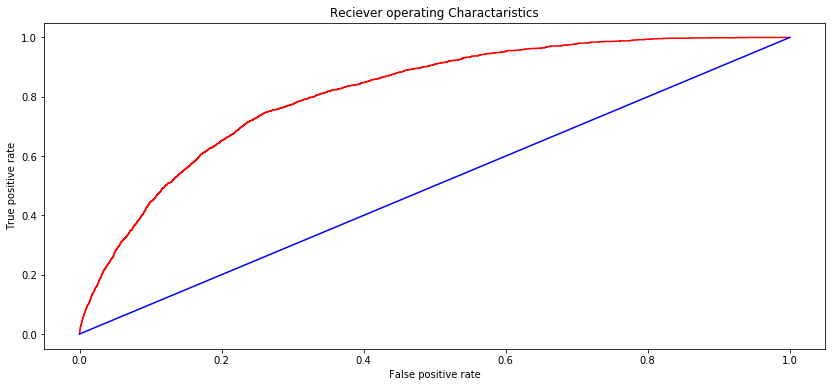

In [21]:
#plot
import matplotlib.pyplot as plt
y_proba = lr.predict_proba(X)[:,1]
fpr,tpr,th = roc_curve(y,y_proba)

plt.figure(figsize=(14,6))
plt.plot(fpr,tpr,color='r')
plt.plot([0,1],[0,1],color='b')
plt.title('Reciever operating Charactaristics')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [108]:
# combine models
lr1 = LogisticRegression(C=50, class_weight='balanced', random_state=1, penalty='l2')
lr1.fit(X_train,y_train)
lr2 = LogisticRegression(C=20, class_weight='balanced', random_state=1, penalty='l1')
lr2.fit(X_train,y_train)
#r3 = LogisticRegression(C=50, class_weight='balanced', random_state=1, penalty='l1')
lr3.fit(X_train,y_train)

y_prob = (lr1.predict_proba(X_test)[:,1] + lr2.predict_proba(X_test)[:,1] + lr3.predict_proba(X_test)[:,1]) / 3
y_pred = pd.Series(y_prob).apply(lambda x: 1 if x > 0.5 else 0)
roc_auc_score(y_test, y_pred)

C:\Users\doggy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\doggy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\doggy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.729047619047619

## Test Data

In [96]:
data_test= pd.read_csv('test.csv',encoding='big5')
data_test = data_test.fillna("NaN")
data_test = OHE(data_test)
data_test = Y_N(data_test)
data_test = order_features(data_test)

imr = imr.fit(data_test.values)
imputed_data = imr.transform(data_test.values)

col={}
for j,c in enumerate(data_test.columns):
    col[c] = imputed_data[:, j]
    
data_test_final=pd.DataFrame(col)

C:\Users\doggy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Categorical columns in dataset ['GENDER', 'CHARGE_CITY_CD', 'CONTACT_CITY_CD', 'MARRIAGE_CD', 'CUST_9_SEGMENTS_CD']
(150000, 152)


In [ ]:
# data_test_final.to_csv('test_1.csv',index=False)

In [99]:
lr = LogisticRegression(C=50, class_weight='balanced', random_state=1, penalty='l2')
X,y = data_final.drop('Y1',axis=1), data_final['Y1']
lr.fit(X_train,y_train)
y_pred = lr.predict_proba(data_test_final)[:,1]
y_pred_final=pd.Series(y_pred).apply(lambda x: 1 if x > 0.5 else 0)

#Submit Prediction
submit_test=pd.read_csv('submit_test.csv',encoding='big5')
submit = pd.DataFrame({'CUS_ID':submit_test['CUS_ID'],'Ypred':y_pred_final})
submit.to_csv('test5_SimpleLogistic.csv',index=False)

C:\Users\doggy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
# test 1： C=50 , penalty ="l2" using X,y              #42562  AUC:0.7192346938775509    final：0.7593604061
# test 2： C=20 , penalty ="l1" using X,y              #42691  AUC:0.7318877551020407    final：0.7583181049
# test 3： C=50 , penalty ="l1" using X,y              #42694  AUC:0.733265306122449
# test 4： C=50 , penalty ="l1" using X_train,y_train  #42568  
# test 5： C=50 , penalty ="l2" using X_train,y_train  #42068

## Feature Extraction - RandomForest 

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

drop_col = ['Y1','CUS_ID']
feat_labels = data_final.drop(drop_col,axis=1).columns

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

sfm = SelectFromModel(forest, threshold=0.01, prefit=True)
X_selected = sfm.transform(X_train)

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) LAST_A_CCONTACT_DT             0.064272
 2) CHANNEL_B_POL_CNT              0.062596
 3) IF_ISSUE_I_IND                 0.051863
 4) IF_ADD_R_IND                   0.049705
 5) L1YR_A_ISSUE_CNT               0.043674
 6) IM_IS_B_IND                    0.037438
 7) IF_ISSUE_P_IND                 0.027021
 8) RFM_R                          0.025419
 9) IF_ISSUE_L_IND                 0.024940
10) IF_ISSUE_B_IND                 0.024474
11) APC_CNT                        0.024412
12) REBUY_TIMES_CNT                0.023788
13) IF_ISSUE_D_IND                 0.021748
14) L1YR_PAYMENT_REMINDER_IND      0.020839
15) AGE                            0.019752
16) IF_ADD_IND                     0.019387
17) IF_ADD_G_IND                   0.017857
18) LAST_B_ISSUE_DT                0.016079
19) EDUCATION_CD                   0.015940
20) IF_ISSUE_G_IND                 0.015358
21) IF_ISSUE_H_IND                 0.015352
22) IM_CNT                         0.014929
23) IF_ISSUE_A_IND              

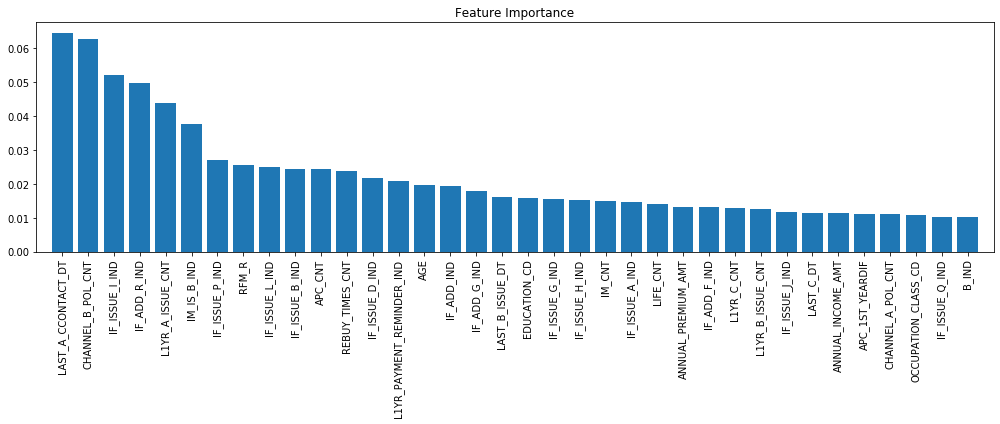

In [69]:
plt.figure(figsize=(14,6))
plt.title('Feature Importance')
plt.bar(range(X_selected.shape[1]), importances[indices[range(X_selected.shape[1])]], align='center')

plt.xticks(range(X_selected.shape[1]), feat_labels[indices[range(X_selected.shape[1])]], rotation=90)
plt.xlim([-1, X_selected.shape[1]])
plt.tight_layout()

plt.show()

In [88]:
new_col = feat_labels[indices[range(X_selected.shape[1])]]
X,y = data_final[new_col], data_final['Y1']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
lr = LogisticRegression(C=50, class_weight='balanced', random_state=1, penalty='l1')
lr.fit(X_train,y_train)
y_pred = pd.Series(lr.predict_proba(X_test)[:,1]).apply(lambda x: 1 if x > 0.5 else 0)
roc = roc_auc_score(y_test, y_pred)

C:\Users\doggy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [89]:
roc

0.6871088435374149